In [1]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

In [2]:
df=pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.shape

(1000, 17)

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


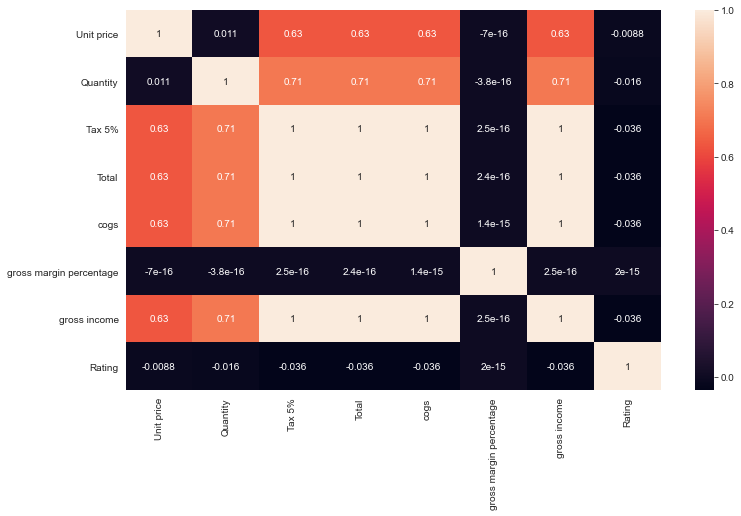

In [5]:
plt.figure(figsize=(12,7))
corrMat=df.corr()
sns.heatmap(corrMat, annot=True)
plt.show()

# Cities

In [6]:
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

### Customer Count

In [7]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Text(0.5, 1.0, 'Customer Count')

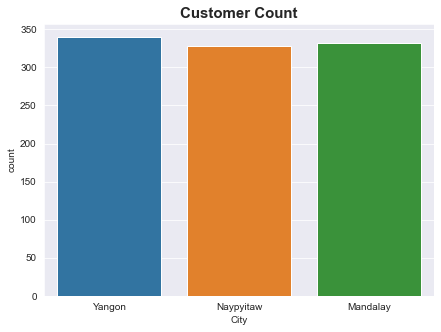

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(x='City',data=df).set_title("Customer Count",fontsize=15,fontdict={"weight": "bold"})

### Total Sales

In [9]:
total_sales=df.groupby("City").sum()
total_sales['Total'].sort_values(ascending=False)

City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total Sales')

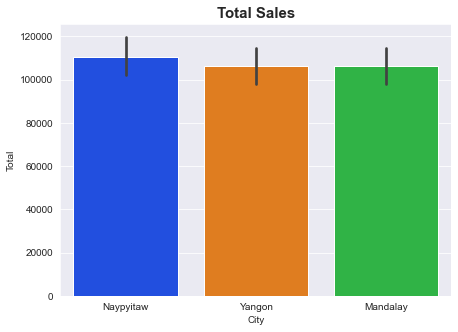

In [10]:
plt.figure(figsize=(7,5))
sns.barplot(x="City",y='Total',data=df,order=["Naypyitaw","Yangon","Mandalay"],palette='bright',estimator=sum).set_title("Total Sales",fontsize=15,fontdict={"weight": "bold"})

### Quantity Sales

In [11]:
total_quantity=df.groupby("City").sum()
total_quantity['Quantity'].sort_values(ascending=False)

City
Yangon       1859
Naypyitaw    1831
Mandalay     1820
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity Sales')

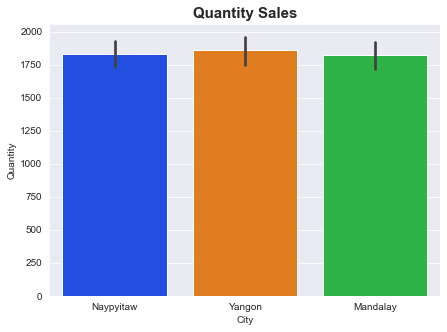

In [12]:
plt.figure(figsize=(7,5))
sns.barplot(x="City",y='Quantity',data=df,order=["Naypyitaw","Yangon","Mandalay"],palette='bright',estimator=sum).set_title("Quantity Sales",fontsize=15,fontdict={"weight": "bold"})

# Customer type

In [13]:
df["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

In [14]:
df.groupby('Customer type').size()

Customer type
Member    501
Normal    499
dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='count'>

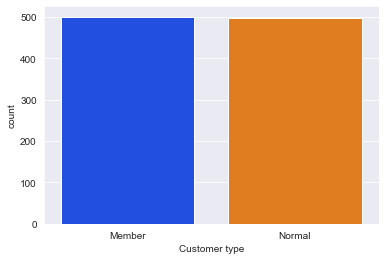

In [15]:
sns.countplot(x='Customer type',data=df,order=["Member","Normal"],palette='bright')

# Gender of Customer

In [16]:
df.groupby('Gender').size()

Gender
Female    501
Male      499
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

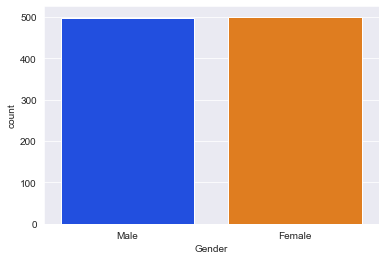

In [17]:
sns.countplot(x='Gender',data=df,order=['Male','Female'],palette='bright')

# Payment Method 

In [18]:
df["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [19]:
df.groupby('Payment').size()

Payment
Cash           344
Credit card    311
Ewallet        345
dtype: int64

Text(0.5, 1.0, 'Payment Method')

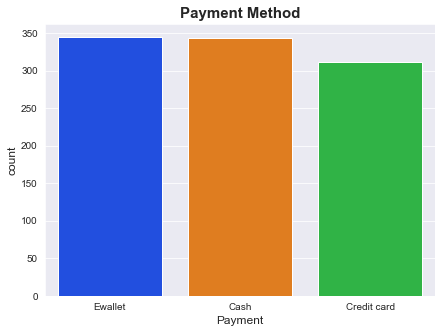

In [20]:
plt.figure(figsize=(7,5))
plt.xlabel("Payment",fontsize=12)
plt.ylabel("Count",fontsize=12)
sns.countplot(x='Payment',data=df,palette='bright').set_title("Payment Method",fontsize=15,fontdict={"weight": "bold"}) 


#### Result: Max number of customer pay through Ewallet.Number of customer who pay through cash are almost same as the customer who pay through Ewallet.Less number of customer pay thruogh  credit card.

# Each Product Line

In [21]:
 df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

### Total Sell

In [22]:
product=df.groupby("Product line").sum()
product["Total"].sort_values(ascending=False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total Sales')

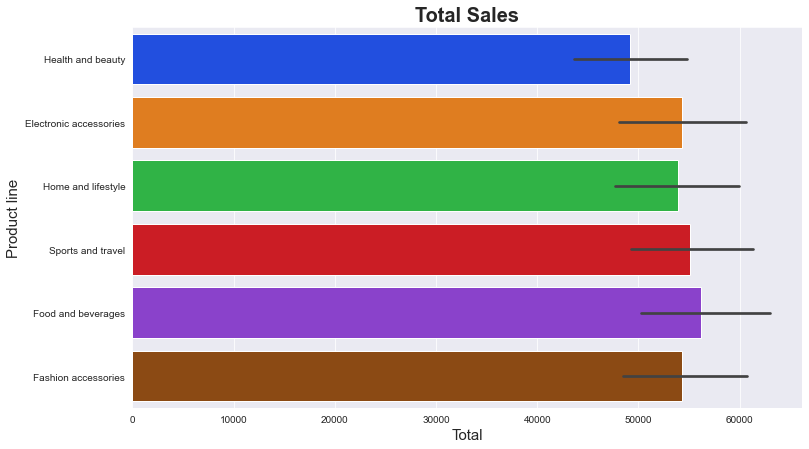

In [23]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Total',y="Product line",data=df,palette='bright',estimator=sum).set_title('Total Sales',fontsize=20,fontdict={"weight": "bold"})

### Amount of Selling Quantity

In [24]:
product["Quantity"].sort_values(ascending=False)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity Sales')

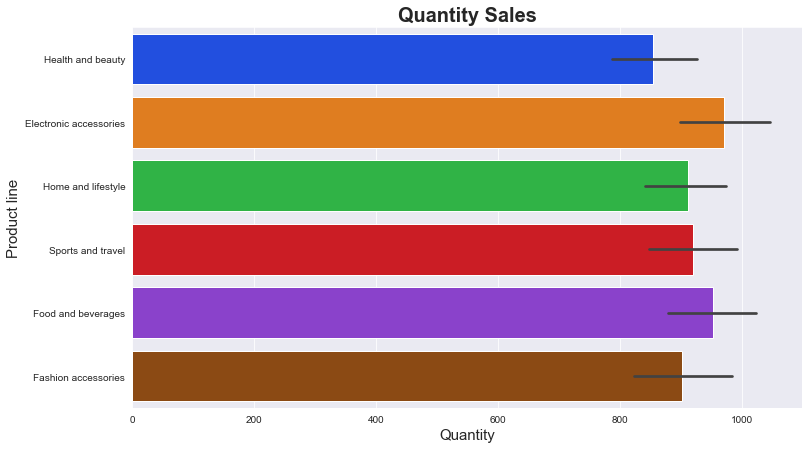

In [25]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Quantity',y="Product line",data=df,palette='bright',estimator=sum).set_title('Quantity Sales',fontsize=20,fontdict={"weight": "bold"})

### Gross Income

In [26]:
product["gross income"].sort_values(ascending=False)

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

In [27]:
 df["gross margin percentage"].unique()

array([4.76190476])

#### Gross margin percentage is fixed for every product line

# Peak Hour  - Off Peak Hour

In [28]:
df["Hour"]=df["Time"].str[0:2]

In [29]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


In [30]:
df["Hour"].unique()

array(['13', '10', '20', '18', '14', '11', '17', '16', '19', '15', '12'],
      dtype=object)

In [31]:
df['Hour'].dtype

dtype('O')

In [32]:
df['Hour']=pd.to_numeric(df['Hour'])
df['Hour'].dtype

dtype('int64')

In [33]:
hours=df.groupby("Hour").sum()
hours["Total"]

Hour
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

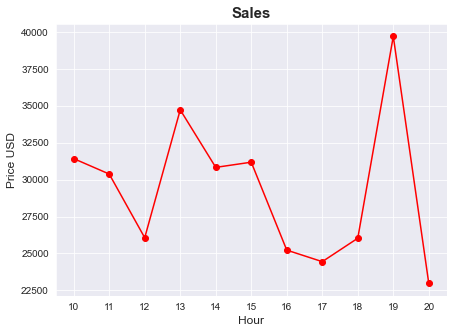

In [34]:
Hour=range(10,21)

x=Hour
y=hours['Total']
plt.figure(figsize=(7,5))
plt.title('Sales',fontsize=15,fontdict={"weight": "bold"})
plt.plot(x,y,color='r',marker='o',markerfacecolor='r')
plt.xticks(Hour)
plt.xlabel("Hour",fontsize=12)
plt.ylabel("Price USD",fontsize=12)
plt.grid(True)

plt.show()

Result: As 7:00 pm is the most selling time.so, 6:00 pm wil be ideal time for the advertisement.   

In [35]:
hours=df.groupby("Hour").sum()
hours["Quantity"]

Hour
10    525
11    513
12    501
13    585
14    495
15    530
16    420
17    415
18    475
19    649
20    402
Name: Quantity, dtype: int64

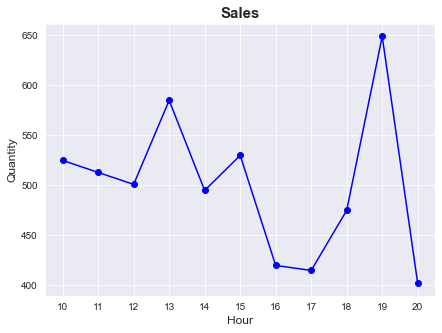

In [36]:
Hour=range(10,21)

x=Hour
y=hours['Quantity']

plt.figure(figsize=(7,5))
plt.title('Sales',fontsize=15,fontdict={"weight": "bold"})
plt.plot(x,y,color='b',marker='o',markerfacecolor='b')
plt.xticks(Hour)
plt.xlabel("Hour",fontsize=12)
plt.ylabel("Quantity",fontsize=12)
plt.grid(True)

plt.show()

# Rating

In [37]:
df["Rating"].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

e:\program files\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating-Count')

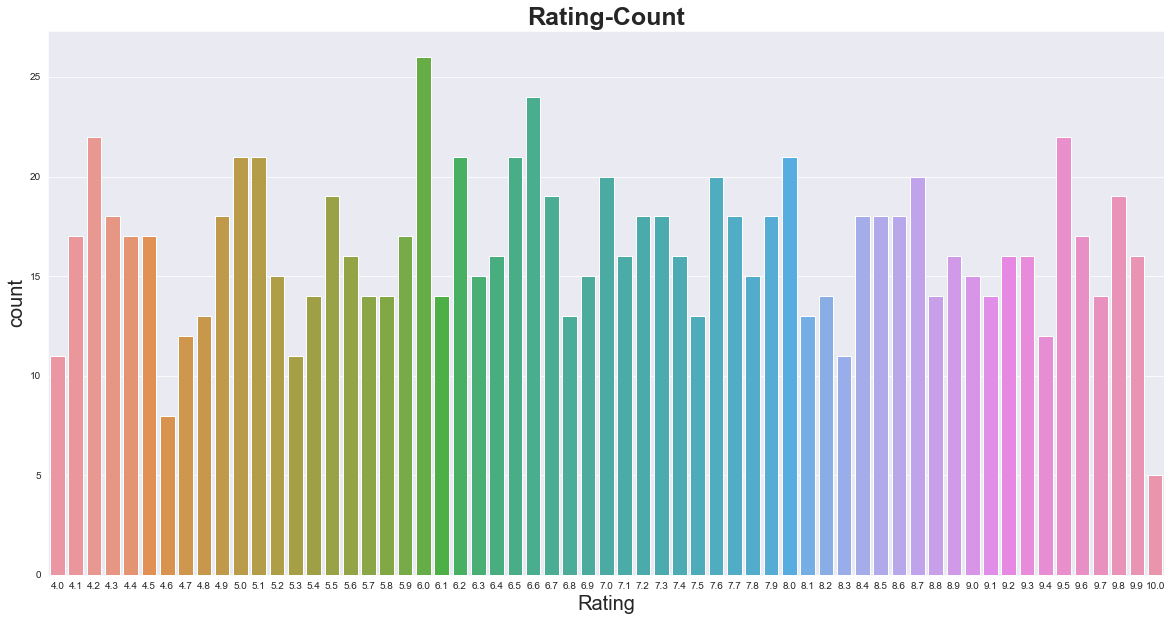

In [38]:
plt.figure(figsize=(20,10))
plt.xlabel("Rating",fontsize=20)
plt.ylabel("Count",fontsize=20)
sns.countplot(df["Rating"],data=df).set_title('Rating-Count',fontsize=25,fontdict={"weight": "bold"})

In [39]:
# converting 'Rating' from float to int

df['Rating'] = df['Rating'].astype('int')
df['Rating'].dtype

dtype('int32')

In [40]:
df['Rating'].unique()

array([ 9,  7,  8,  5,  4,  6, 10])

In [41]:
df['Rating'].value_counts()

6     184
7     172
8     163
5     162
9     161
4     153
10      5
Name: Rating, dtype: int64

e:\program files\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating-Count')

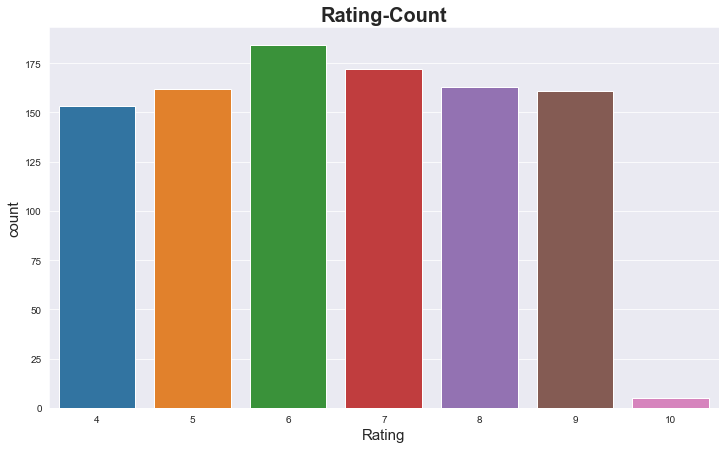

In [42]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(df["Rating"],data=df).set_title('Rating-Count',fontsize=20,fontdict={"weight": "bold"})

# Rating on each product line

In [43]:
df['Rating'].groupby(df['Product line']).median().sort_values(ascending=False)

Product line
Home and lifestyle        7.0
Health and beauty         7.0
Food and beverages        7.0
Fashion accessories       6.5
Sports and travel         6.0
Electronic accessories    6.0
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Rating-Product line')

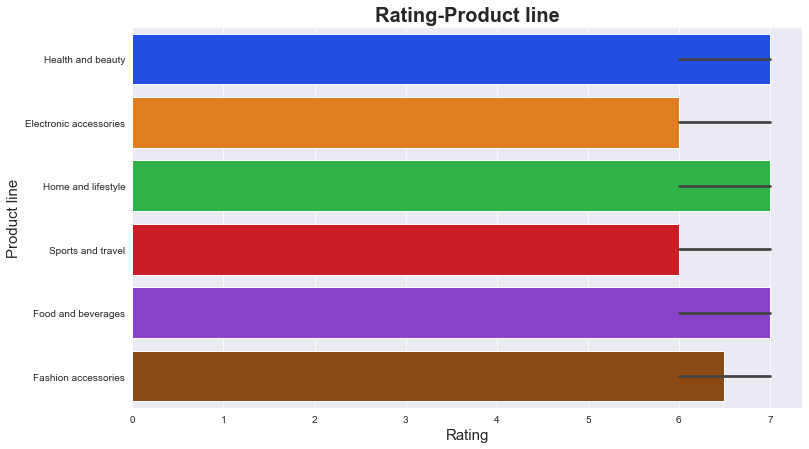

In [44]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Rating',y="Product line",data=df,palette='bright',estimator=np.median).set_title('Rating-Product line',fontsize=20,fontdict={"weight": "bold"})

# Analyze  Each Branch

In [45]:
gb=df.groupby('City')
yangon_df=gb.get_group("Yangon")
Naypyitaw_df=gb.get_group("Naypyitaw")
Mandalay_df=gb.get_group("Mandalay")

# Yangon 

In [46]:
yangon_df.groupby('Customer type').size()

Customer type
Member    167
Normal    173
dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='count'>

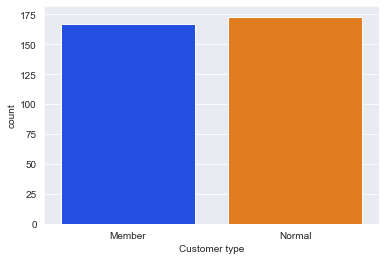

In [47]:
sns.countplot(x='Customer type',data=yangon_df,order=["Member","Normal"],palette='bright')

In [48]:
yangon_df.groupby('Gender').size()

Gender
Female    161
Male      179
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

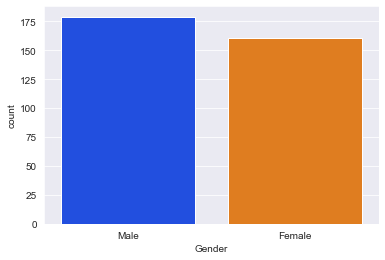

In [49]:
sns.countplot(x='Gender',data=yangon_df,order=['Male','Female'],palette='bright')

In [50]:
yangon_df.groupby(['Customer type', 'Gender']).size()

Customer type  Gender
Member         Female    80
               Male      87
Normal         Female    81
               Male      92
dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

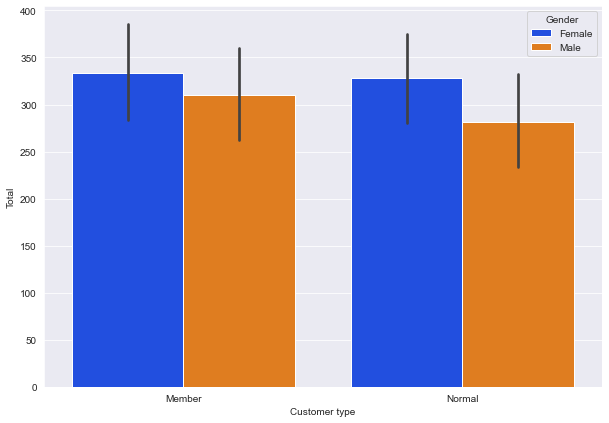

In [51]:
#average sales

plt.figure(figsize=(10,7))
sns.barplot(x="Customer type",y='Total',hue="Gender",data=yangon_df,palette='bright')

In [52]:
yangon_df.groupby('Payment').size().sort_values(ascending=False)

Payment
Ewallet        126
Cash           110
Credit card    104
dtype: int64

Text(0.5, 1.0, 'Payment Method')

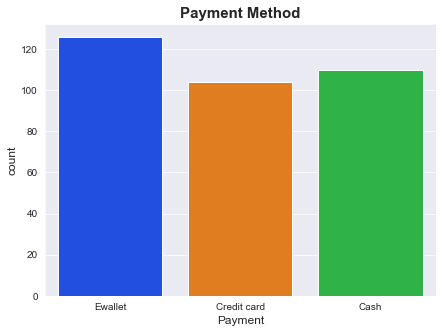

In [53]:
plt.figure(figsize=(7,5))
plt.xlabel("Payment",fontsize=12)
plt.ylabel("Count",fontsize=12)
sns.countplot(x='Payment',data=yangon_df,palette='bright').set_title("Payment Method",fontsize=15,fontdict={"weight": "bold"}) 

In [54]:
yangon_df['Total'].groupby(yangon_df['Product line']).sum().sort_values(ascending=False)

Product line
Home and lifestyle        22417.1955
Sports and travel         19372.6995
Electronic accessories    18317.1135
Food and beverages        17163.1005
Fashion accessories       16332.5085
Health and beauty         12597.7530
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total Sales (Yangon)')

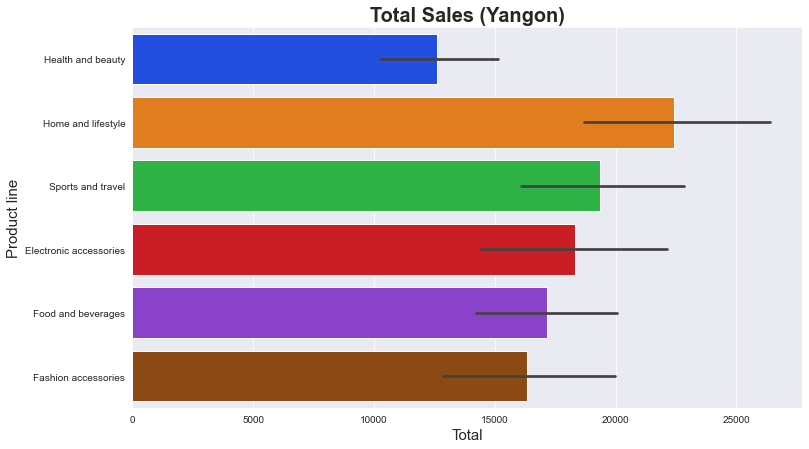

In [55]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Total',y="Product line",data=yangon_df,palette='bright',estimator=sum).set_title('Total Sales (Yangon)',fontsize=20,fontdict={"weight": "bold"})

In [56]:
yangon_df['Quantity'].groupby(yangon_df['Product line']).sum().sort_values(ascending=False)

Product line
Home and lifestyle        371
Sports and travel         333
Electronic accessories    322
Food and beverages        313
Fashion accessories       263
Health and beauty         257
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity Sales (Yangon)')

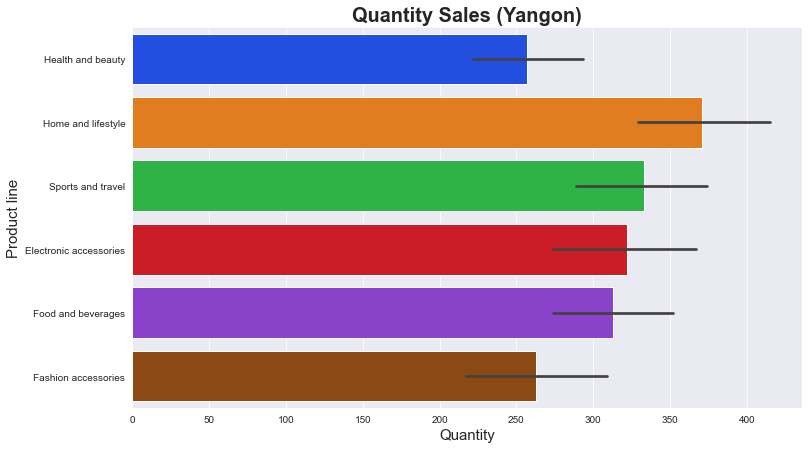

In [57]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Quantity',y="Product line",data=yangon_df,palette='bright',estimator=sum).set_title('Quantity Sales (Yangon)',fontsize=20,fontdict={"weight": "bold"})

In [58]:
yangon_df.groupby(['Gender', 'Customer type', 'Product line']).size().sort_values(ascending=False)

Gender  Customer type  Product line          
Male    Normal         Sports and travel         19
        Member         Electronic accessories    19
                       Food and beverages        19
Female  Member         Sports and travel         18
Male    Member         Home and lifestyle        18
Female  Normal         Electronic accessories    16
                       Home and lifestyle        16
        Member         Home and lifestyle        16
        Normal         Fashion accessories       16
Male    Normal         Food and beverages        16
                       Health and beauty         16
                       Home and lifestyle        15
                       Electronic accessories    13
                       Fashion accessories       13
Female  Normal         Food and beverages        13
        Member         Fashion accessories       12
                       Health and beauty         12
                       Electronic accessories    12
Male    Member    

In [59]:
yangon_df['Total'].groupby(yangon_df['Hour']).sum().sort_values(ascending=False)

Hour
11    11349.8910
15    11273.7030
10    11208.4140
16    10869.7365
13    10443.7515
19    10330.2570
12     9485.0700
17     9043.7340
14     8852.4135
18     7447.0200
20     5896.3800
Name: Total, dtype: float64

Text(0.5, 1.0, 'Sale Hour (Yangon)')

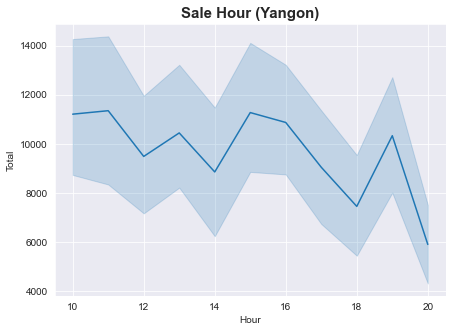

In [60]:
plt.figure(figsize=(7,5))
sns.lineplot(x=yangon_df['Hour'],y='Total',data=yangon_df,estimator=sum).set_title("Sale Hour (Yangon)",fontsize=15,fontdict={"weight": "bold"}) 

In [61]:
yangon_df['Quantity'].groupby(yangon_df['Hour']).sum().sort_values(ascending=False)

Hour
15    193
10    192
12    186
11    185
13    183
16    182
19    172
18    162
17    158
20    125
14    121
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity Sales (Yangon)')

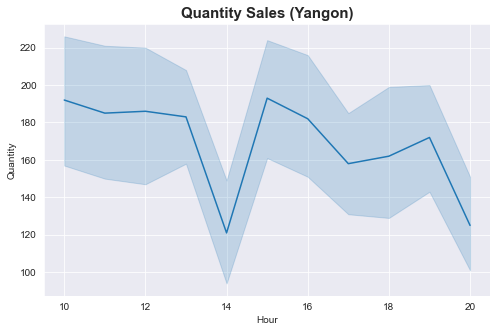

In [62]:
plt.figure(figsize=(8,5))
sns.lineplot(x=yangon_df['Hour'],y='Quantity',data=yangon_df,estimator=sum).set_title("Quantity Sales (Yangon)",fontsize=15,fontdict={"weight": "bold"}) 

In [63]:
yangon_df['Rating'].value_counts()

7     67
9     61
6     55
5     54
4     52
8     50
10     1
Name: Rating, dtype: int64

e:\program files\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating-Count')

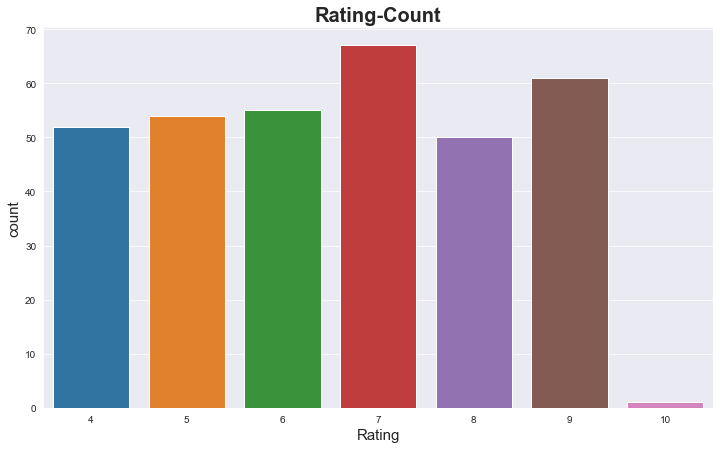

In [64]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(yangon_df["Rating"],data=yangon_df).set_title('Rating-Count',fontsize=20,fontdict={"weight": "bold"})

In [65]:
yangon_df['Rating'].groupby(yangon_df['Product line']).median().sort_values(ascending=False)

Product line
Sports and travel         7
Home and lifestyle        7
Food and beverages        7
Fashion accessories       7
Health and beauty         6
Electronic accessories    6
Name: Rating, dtype: int32

Text(0.5, 1.0, 'Rating-Product line (Yangon)')

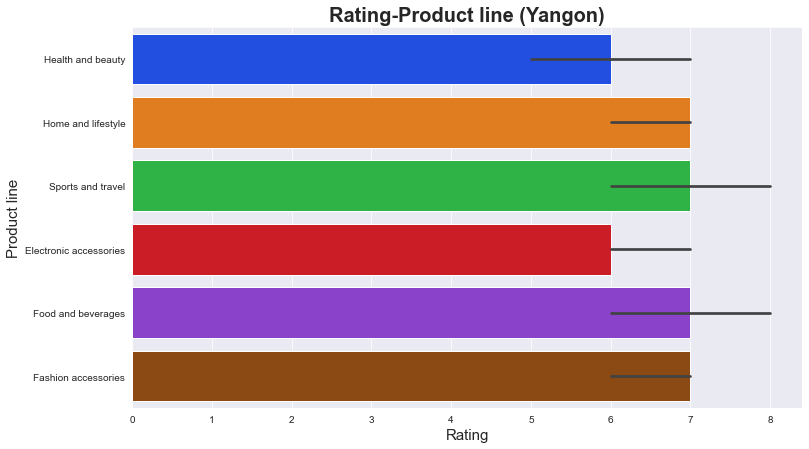

In [66]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x="Rating",y='Product line',data=yangon_df,palette='bright',estimator=np.median).set_title('Rating-Product line (Yangon)',fontsize=20,fontdict={"weight": "bold"})

# Naypyitaw

In [67]:
Naypyitaw_df.groupby('Customer type').size()

Customer type
Member    169
Normal    159
dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='count'>

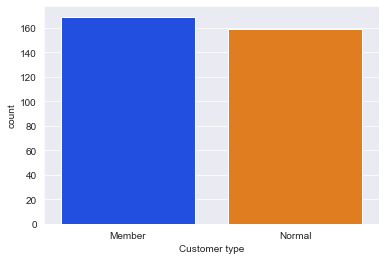

In [68]:
sns.countplot(x='Customer type',data=Naypyitaw_df,order=["Member","Normal"],palette='bright')

In [69]:
Naypyitaw_df.groupby('Gender').size()

Gender
Female    178
Male      150
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

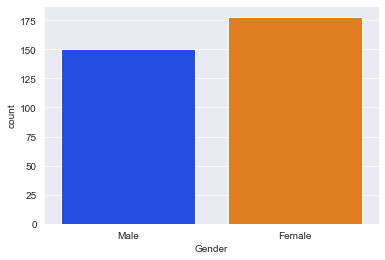

In [70]:
sns.countplot(x='Gender',data=Naypyitaw_df,order=['Male','Female'],palette='bright')

In [71]:
Naypyitaw_df.groupby(['Customer type', 'Gender']).size()

Customer type  Gender
Member         Female    96
               Male      73
Normal         Female    82
               Male      77
dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

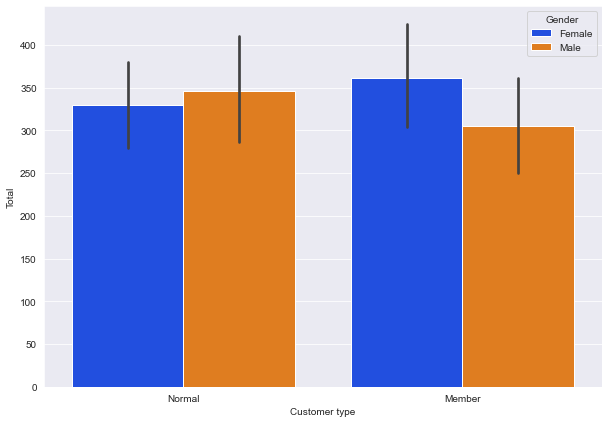

In [72]:
#average sales

plt.figure(figsize=(10,7))
sns.barplot(x="Customer type",y='Total',hue="Gender",data=Naypyitaw_df,palette='bright')

In [73]:
Naypyitaw_df.groupby('Payment').size().sort_values(ascending=False)

Payment
Cash           124
Ewallet        106
Credit card     98
dtype: int64

Text(0.5, 1.0, 'Payment Method')

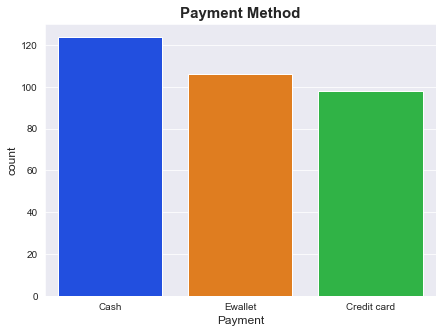

In [74]:
plt.figure(figsize=(7,5))
plt.xlabel("Payment",fontsize=12)
plt.ylabel("Count",fontsize=12)
sns.countplot(x='Payment',data=Naypyitaw_df,palette='bright').set_title("Payment Method",fontsize=15,fontdict={"weight": "bold"}) 

In [75]:
Naypyitaw_df['Total'].groupby(Naypyitaw_df['Product line']).sum().sort_values(ascending=False)

Product line
Food and beverages        23766.8550
Fashion accessories       21560.0700
Electronic accessories    18968.9745
Health and beauty         16615.3260
Sports and travel         15761.9280
Home and lifestyle        13895.5530
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total Sales (Naypyitaw)')

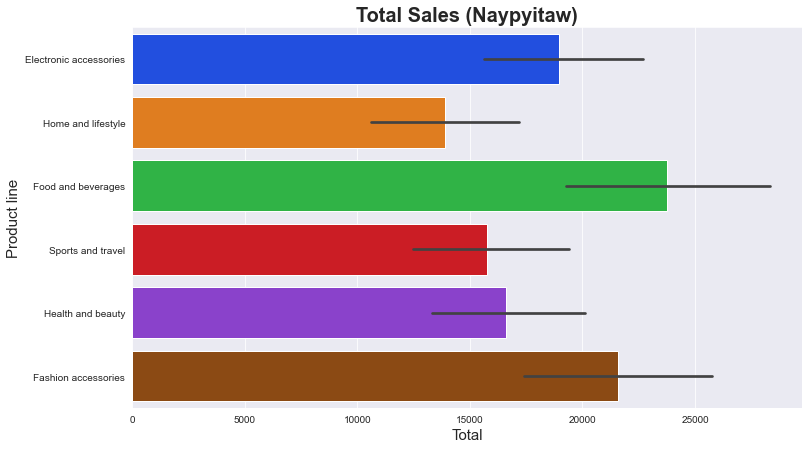

In [76]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Total',y="Product line",data=Naypyitaw_df,palette='bright',estimator=sum).set_title('Total Sales (Naypyitaw)',fontsize=20,fontdict={"weight": "bold"})

In [77]:
Naypyitaw_df['Quantity'].groupby(Naypyitaw_df['Product line']).sum().sort_values(ascending=False)

Product line
Food and beverages        369
Fashion accessories       342
Electronic accessories    333
Health and beauty         277
Sports and travel         265
Home and lifestyle        245
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity Sales (Naypyitaw)')

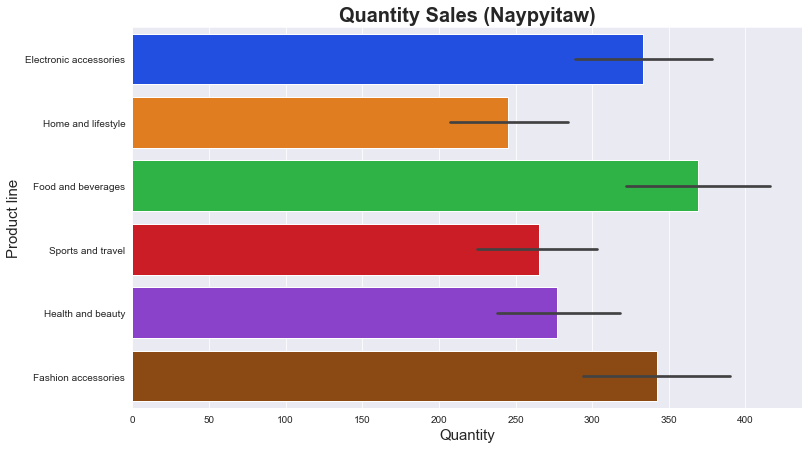

In [78]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Quantity',y="Product line",data=Naypyitaw_df,palette='bright',estimator=sum).set_title('Quantity Sales (Naypyitaw)',fontsize=20,fontdict={"weight": "bold"})

In [79]:
Naypyitaw_df.groupby(['Gender', 'Customer type', 'Product line']).size().sort_values(ascending=False)

Gender  Customer type  Product line          
Female  Member         Food and beverages        23
                       Home and lifestyle        19
                       Fashion accessories       19
        Normal         Electronic accessories    19
Male    Normal         Fashion accessories       17
                       Electronic accessories    16
Female  Normal         Fashion accessories       16
Male    Normal         Health and beauty         15
                       Food and beverages        15
Female  Member         Sports and travel         15
        Normal         Food and beverages        15
                       Sports and travel         14
Male    Member         Health and beauty         14
                       Food and beverages        13
                       Sports and travel         13
                       Fashion accessories       13
Female  Normal         Health and beauty         12
Male    Normal         Home and lifestyle        11
        Member    

In [80]:
Naypyitaw_df['Total'].groupby(Naypyitaw_df['Hour']).sum().sort_values(ascending=False)

Hour
19    13106.8035
13    13007.0640
10    11347.2240
14    10281.4215
16    10233.0270
20     9689.0325
15     9664.6410
18     9028.0365
11     8545.6245
12     8105.4015
17     7560.4305
Name: Total, dtype: float64

Text(0.5, 1.0, 'Sale Hour (Naypyitaw)')

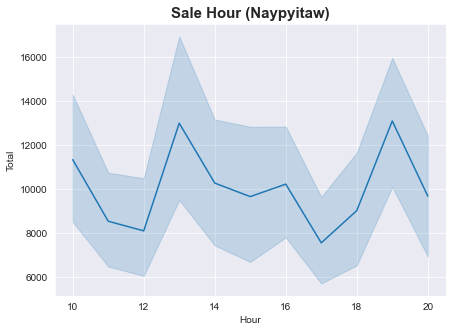

In [81]:
plt.figure(figsize=(7,5))
sns.lineplot(x=Naypyitaw_df['Hour'],y='Total',data=Naypyitaw_df,estimator=sum).set_title("Sale Hour (Naypyitaw)",fontsize=15,fontdict={"weight": "bold"}) 

In [82]:
Naypyitaw_df['Quantity'].groupby(Naypyitaw_df['Hour']).sum().sort_values(ascending=False)

Hour
19    222
13    201
10    181
14    173
12    166
16    161
20    156
17    151
15    146
18    138
11    136
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity Sales (Naypyitaw)')

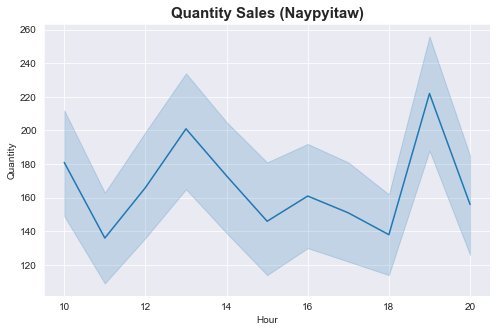

In [83]:
plt.figure(figsize=(8,5))
sns.lineplot(x=Naypyitaw_df['Hour'],y='Quantity',data=Naypyitaw_df,estimator=sum).set_title("Quantity Sales (Naypyitaw)",fontsize=15,fontdict={"weight": "bold"}) 

In [84]:
Naypyitaw_df['Rating'].value_counts()

6     60
9     59
8     59
5     55
7     52
4     42
10     1
Name: Rating, dtype: int64

e:\program files\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating-Count')

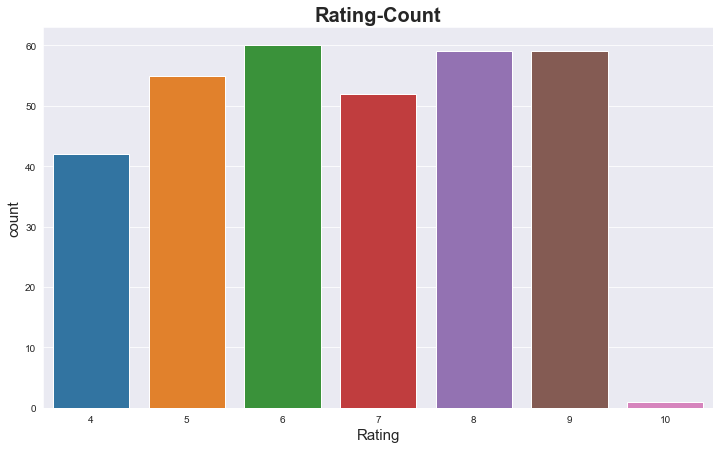

In [85]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(Naypyitaw_df["Rating"],data=Naypyitaw_df).set_title('Rating-Count',fontsize=20,fontdict={"weight": "bold"})

In [86]:
Naypyitaw_df['Rating'].groupby(Naypyitaw_df['Product line']).median().sort_values(ascending=False)

Product line
Home and lifestyle        7
Health and beauty         7
Food and beverages        7
Fashion accessories       7
Sports and travel         6
Electronic accessories    6
Name: Rating, dtype: int32

Text(0.5, 1.0, 'Rating-Product line (Naypyitaw)')

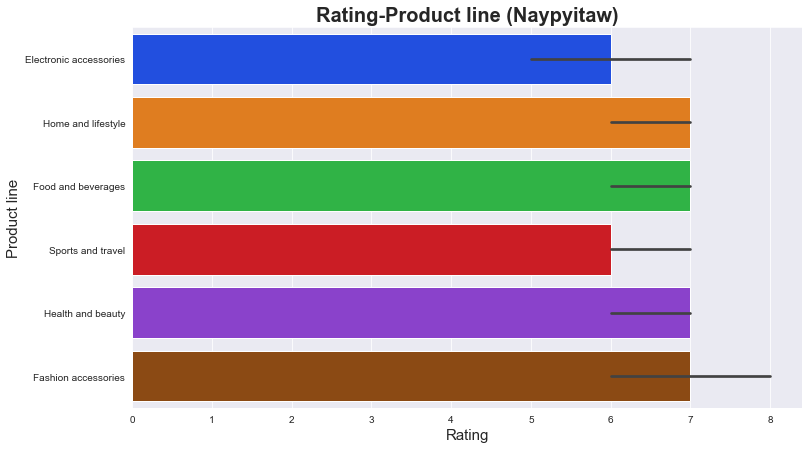

In [87]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x="Rating",y='Product line',data=Naypyitaw_df,palette='bright',estimator=np.median).set_title('Rating-Product line (Naypyitaw)',fontsize=20,fontdict={"weight": "bold"})

# Mandalay

In [88]:
Mandalay_df.groupby('Customer type').size()

Customer type
Member    165
Normal    167
dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='count'>

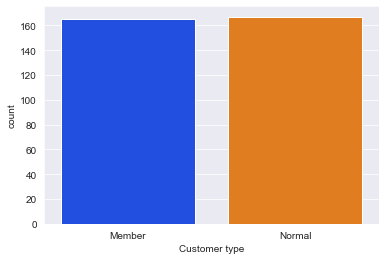

In [89]:
sns.countplot(x='Customer type',data=Mandalay_df,order=["Member","Normal"],palette='bright')

In [90]:
Mandalay_df.groupby('Gender').size()

Gender
Female    162
Male      170
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

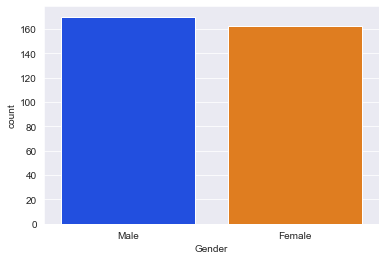

In [91]:
sns.countplot(x='Gender',data=Mandalay_df,order=['Male','Female'],palette='bright')

In [92]:
Mandalay_df.groupby(['Customer type', 'Gender']).size()

Customer type  Gender
Member         Female    85
               Male      80
Normal         Female    77
               Male      90
dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

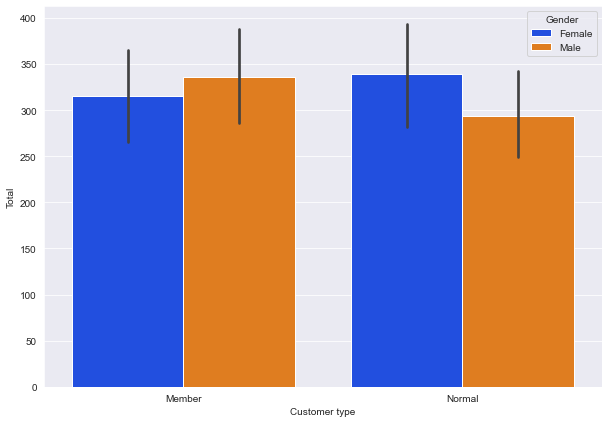

In [93]:
#average sales

plt.figure(figsize=(10,7))
sns.barplot(x="Customer type",y='Total',hue="Gender",data=Mandalay_df,palette='bright')

In [94]:
Mandalay_df.groupby('Payment').size().sort_values(ascending=False)

Payment
Ewallet        113
Cash           110
Credit card    109
dtype: int64

Text(0.5, 1.0, 'Payment Method')

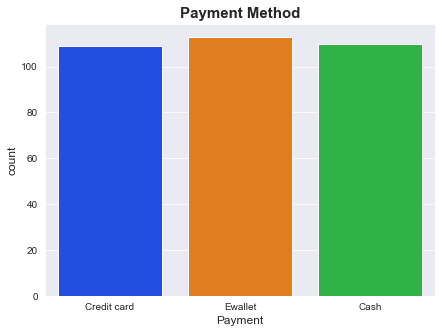

In [95]:
plt.figure(figsize=(7,5))
plt.xlabel("Payment",fontsize=12)
plt.ylabel("Count",fontsize=12)
sns.countplot(x='Payment',data=Mandalay_df,palette='bright').set_title("Payment Method",fontsize=15,fontdict={"weight": "bold"}) 

In [96]:
Mandalay_df['Total'].groupby(Mandalay_df['Product line']).sum().sort_values(ascending=False)

Product line
Sports and travel         19988.1990
Health and beauty         19980.6600
Home and lifestyle        17549.1645
Electronic accessories    17051.4435
Fashion accessories       16413.3165
Food and beverages        15214.8885
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total Sales (Mandalay)')

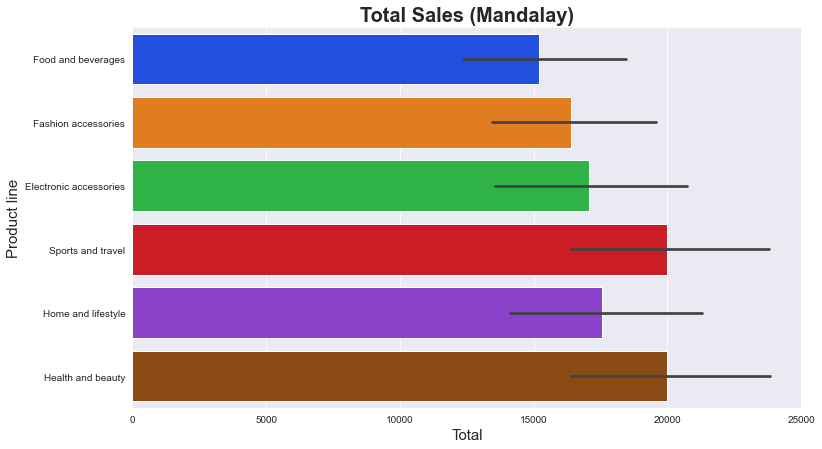

In [97]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Total',y="Product line",data=Mandalay_df,palette='bright',estimator=sum).set_title('Total Sales (Mandalay)',fontsize=20,fontdict={"weight": "bold"})

In [98]:
Mandalay_df['Quantity'].groupby(yangon_df['Product line']).sum().sort_values(ascending=False)

Series([], Name: Quantity, dtype: int64)

Text(0.5, 1.0, 'Quantity Sales (Mandalay)')

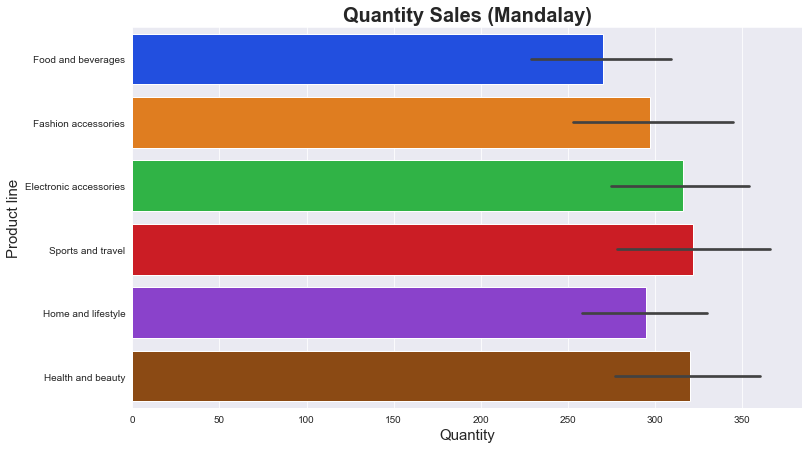

In [99]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Quantity',y="Product line",data=Mandalay_df,palette='bright',estimator=sum).set_title('Quantity Sales (Mandalay)',fontsize=20,fontdict={"weight": "bold"})

In [100]:
Mandalay_df.groupby(['Gender', 'Customer type', 'Product line']).size().sort_values(ascending=False)

Gender  Customer type  Product line          
Male    Normal         Sports and travel         20
                       Home and lifestyle        19
        Member         Health and beauty         19
Female  Member         Food and beverages        18
                       Sports and travel         18
        Normal         Fashion accessories       17
Male    Member         Fashion accessories       16
Female  Member         Fashion accessories       16
        Normal         Electronic accessories    14
        Member         Electronic accessories    14
Male    Normal         Electronic accessories    14
                       Health and beauty         14
        Member         Electronic accessories    13
Female  Normal         Health and beauty         13
Male    Normal         Fashion accessories       13
        Member         Sports and travel         12
Female  Member         Home and lifestyle        12
        Normal         Sports and travel         12
Male    Member    

In [101]:
Mandalay_df['Total'].groupby(Mandalay_df['Hour']).sum().sort_values(ascending=False)

Hour
19    16262.4525
14    11694.5640
13    11272.4115
11    10481.8140
15    10241.1645
18     9555.2835
10     8865.8430
12     8475.4110
17     7841.0535
20     7384.1145
16     4123.5600
Name: Total, dtype: float64

Text(0.5, 1.0, 'Sale Hour (Mandalay)')

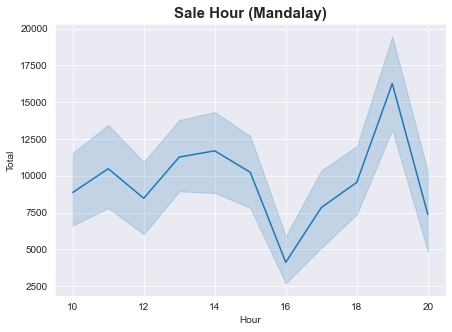

In [102]:
plt.figure(figsize=(7,5))
sns.lineplot(x=Mandalay_df['Hour'],y='Total',data=Mandalay_df,estimator=sum).set_title("Sale Hour (Mandalay)",fontsize=15,fontdict={"weight": "bold"}) 

In [103]:
Mandalay_df['Quantity'].groupby(Mandalay_df['Hour']).sum().sort_values(ascending=False)

Hour
19    255
14    201
13    201
11    192
15    191
18    175
10    152
12    149
20    121
17    106
16     77
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity Sales (Mandalay)')

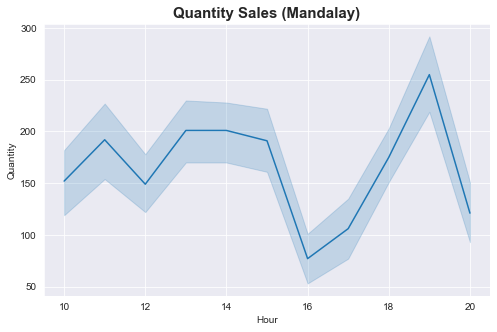

In [104]:
plt.figure(figsize=(8,5))
sns.lineplot(x=Mandalay_df['Hour'],y='Quantity',data=Mandalay_df,estimator=sum).set_title("Quantity Sales (Mandalay)",fontsize=15,fontdict={"weight": "bold"}) 

In [105]:
Mandalay_df['Rating'].value_counts()

6     69
4     59
8     54
7     53
5     53
9     41
10     3
Name: Rating, dtype: int64

e:\program files\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating-Count')

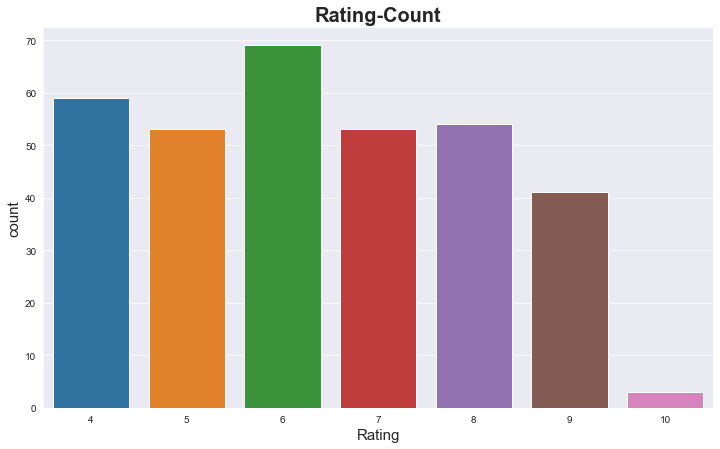

In [106]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(Mandalay_df["Rating"],data=Mandalay_df).set_title('Rating-Count',fontsize=20,fontdict={"weight": "bold"})

In [107]:
Mandalay_df['Rating'].groupby(Mandalay_df['Product line']).median().sort_values(ascending=False)

Product line
Health and beauty         7
Electronic accessories    7
Sports and travel         6
Home and lifestyle        6
Food and beverages        6
Fashion accessories       6
Name: Rating, dtype: int32

Text(0.5, 1.0, 'Rating-Product line (Mandalay)')

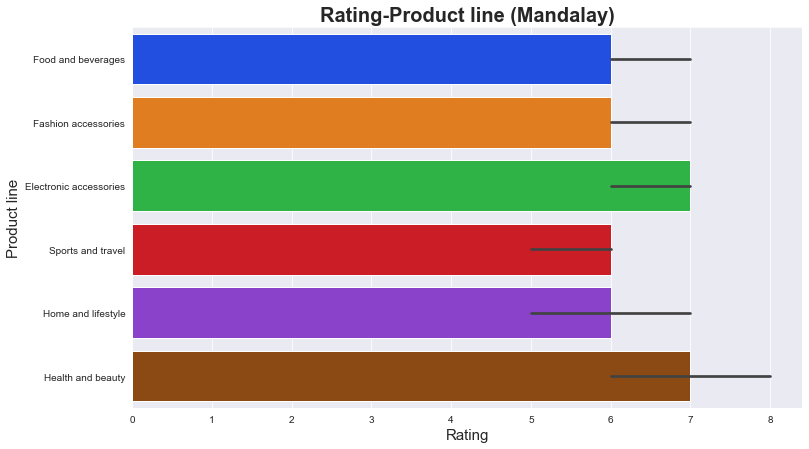

In [108]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x="Rating",y='Product line',data=Mandalay_df,palette='bright',estimator=np.median).set_title('Rating-Product line (Mandalay)',fontsize=20,fontdict={"weight": "bold"})